In [1]:
import seaborn as sns

# 这里从 seaborn 导入鸢尾花数据集，是为了呈现出 DataFrame 的效果
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


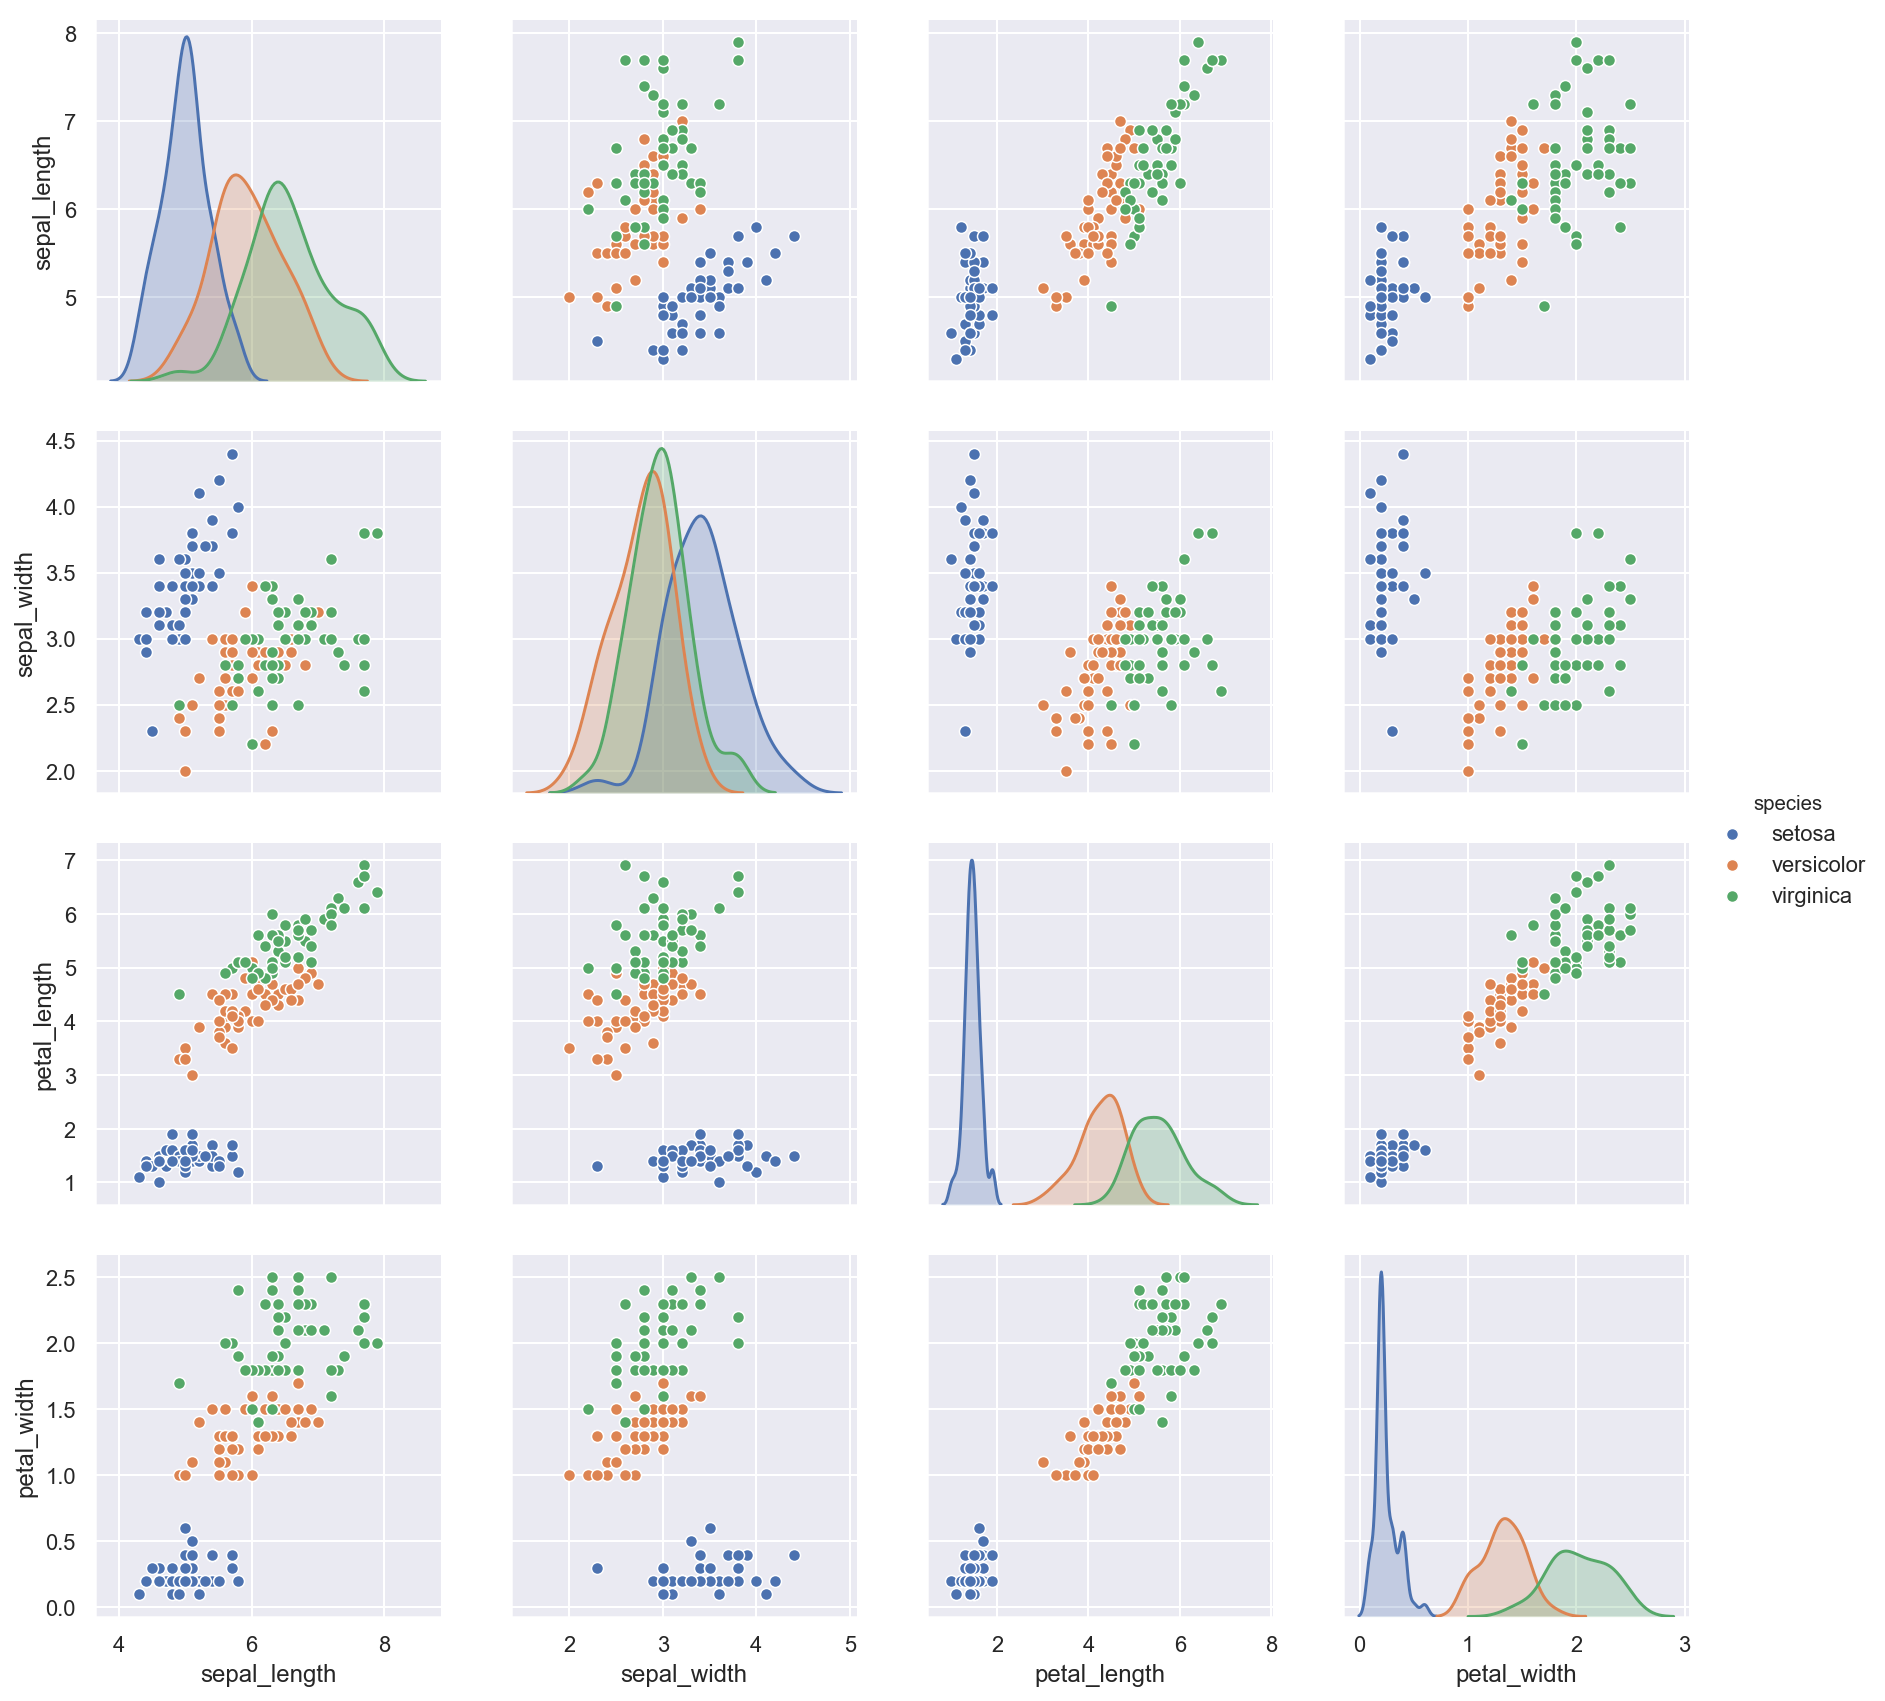

In [2]:
%matplotlib inline
import seaborn as sns
sns.set()

# hue 是分类变量，size 调整显示图的大小
sns.pairplot(iris, hue='species', size=3)
plt.show()

### 分离出“特征矩阵”和“目标数组”

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

## 有监督学习示例：简单线性回归

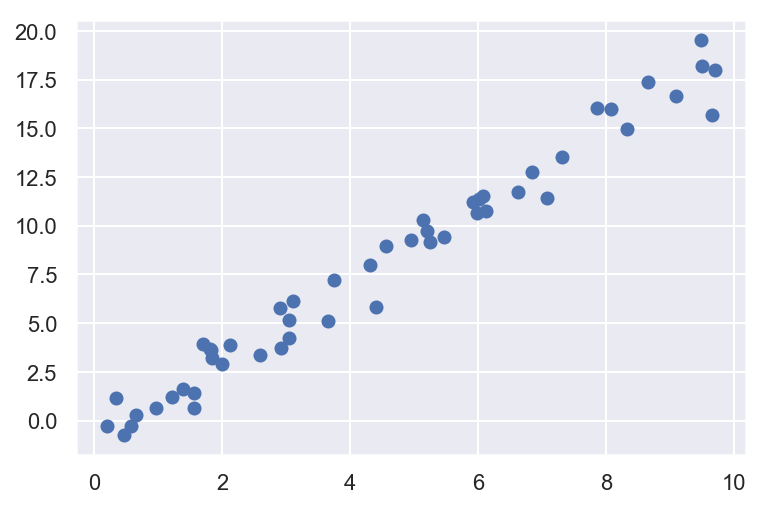

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(fit_intercept=True)  # 是否想要拟合直线的截距
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [9]:
x.shape

(50,)

In [10]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
model.coef_

array([1.9776566])

In [13]:
model.intercept_

-0.9033107255311146

In [14]:
xfit = np.linspace(-1, 11)

In [15]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

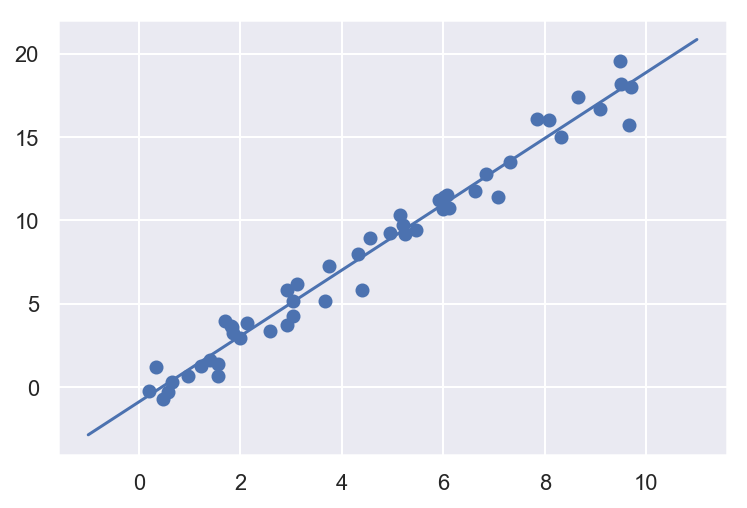

In [16]:
plt.scatter(x, y)  # 描点
plt.plot(xfit, yfit)
# 绘制拟合直线

## 有监督学习

鸢尾花数据分类。

In [17]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

## 无监督学习示例，鸢尾花数据降维

In [20]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


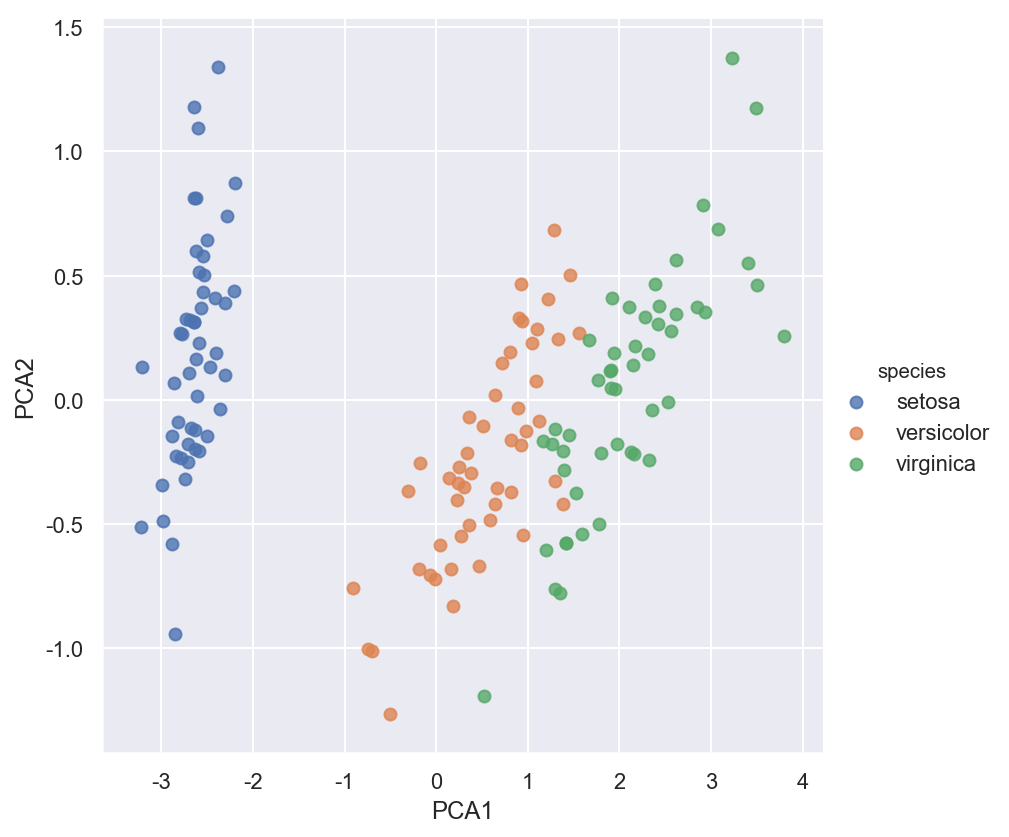

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

# 回归图 fit_reg=True
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False, size=6)
plt.show()

虽然 PCA 算法根本不知道花的种类标签，但不同种类的花还是被很清晰地区分开来。

## 无监督学习示例：鸢尾花数据聚类

高斯混合模型，就是一个强大的聚类方法。

In [22]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

In [23]:
iris['cluster'] = y_gmm
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0
5,5.4,3.9,1.7,0.4,setosa,-2.280860,0.741330,0
6,4.6,3.4,1.4,0.3,setosa,-2.820538,-0.089461,0
7,5.0,3.4,1.5,0.2,setosa,-2.626145,0.163385,0
8,4.4,2.9,1.4,0.2,setosa,-2.886383,-0.578312,0
9,4.9,3.1,1.5,0.1,setosa,-2.672756,-0.113774,0


seaborn 还是很强大的，下面这张图把真正的类别和聚类的效果都显示在一张图上了。

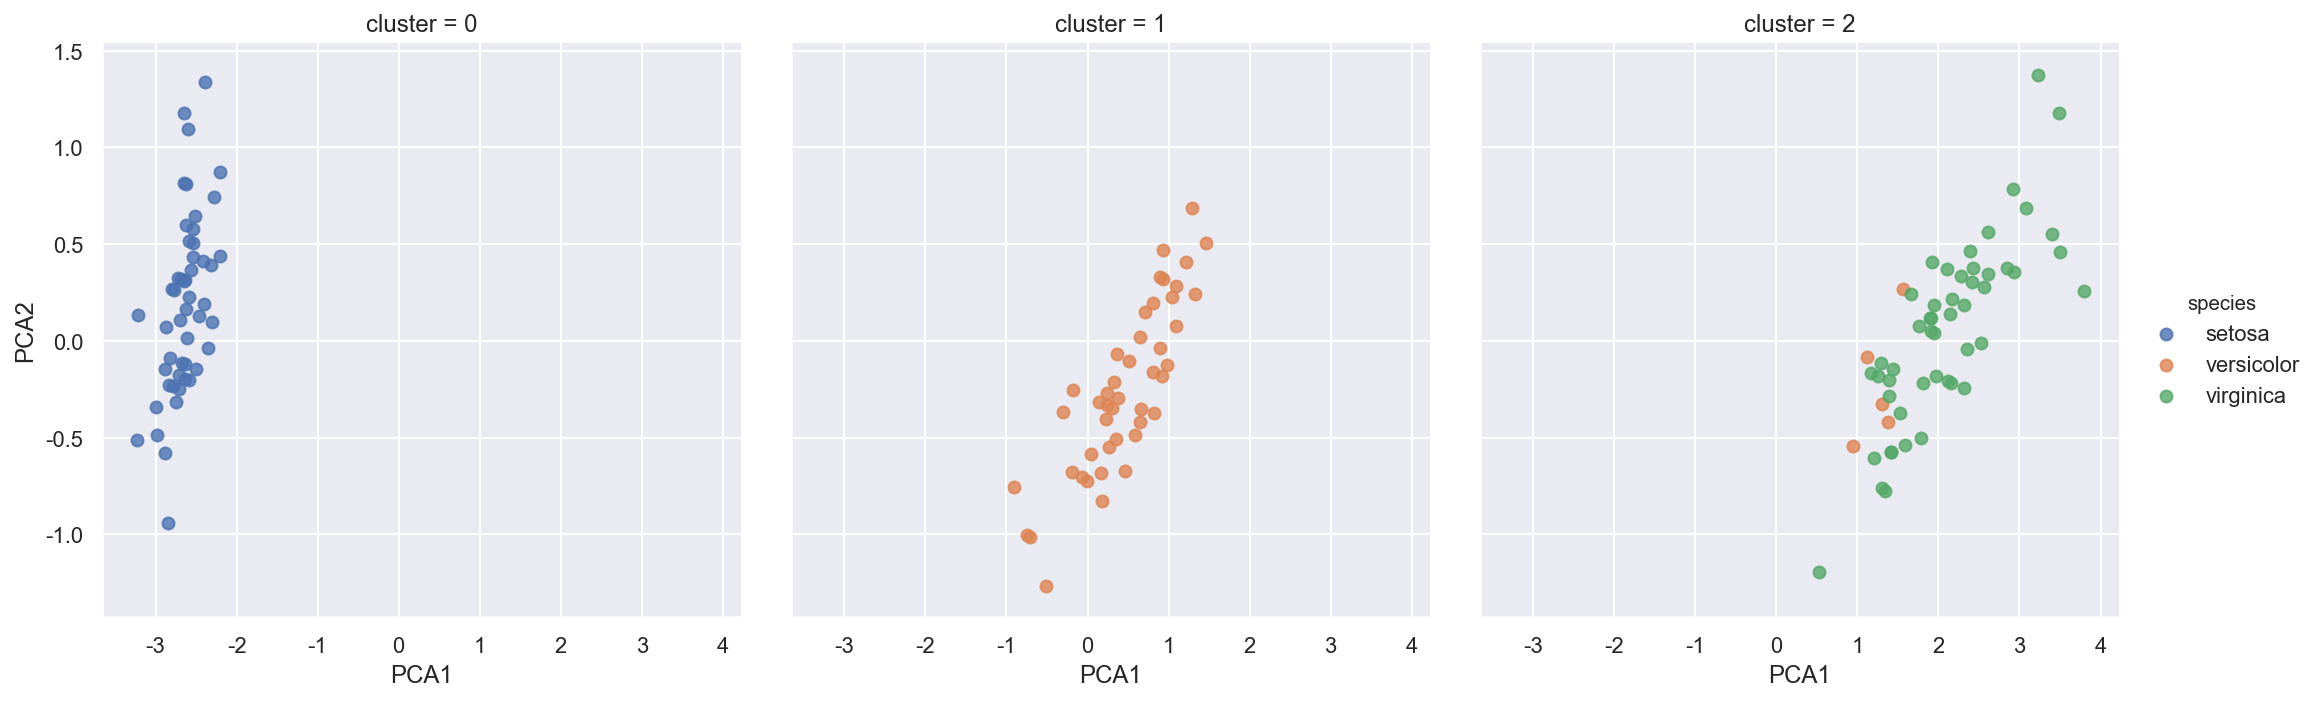

In [24]:
sns.lmplot(
    "PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

## 应用：手写数字探索

In [25]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

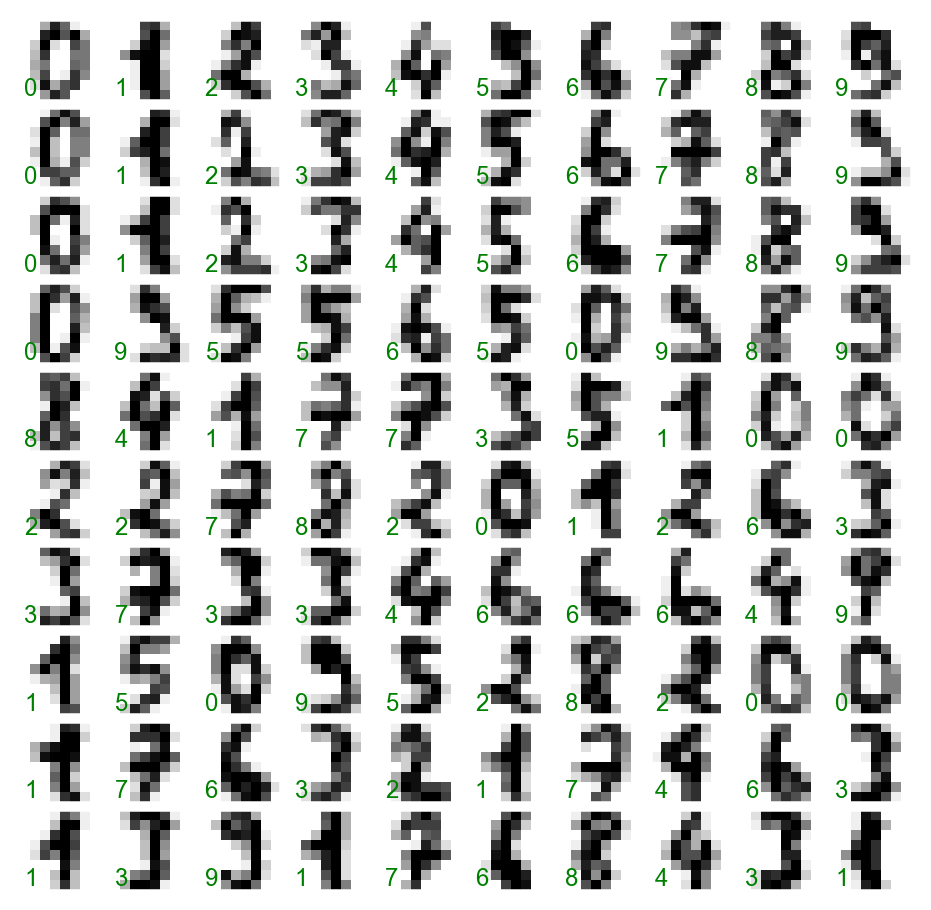

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    10,
    10,
    figsize=(8, 8),
    subplot_kw={'xticks': [],
                'yticks': []},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(
        0.05,
        0.05,
        str(digits.target[i]),
        transform=ax.transAxes,
        color='green')

In [27]:
X = digits.data
X.shape

(1797, 64)

In [28]:
y = digits.target
y.shape

(1797,)

使用流行学习算法中的 Isomap 算法对数据进行降维。

In [29]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

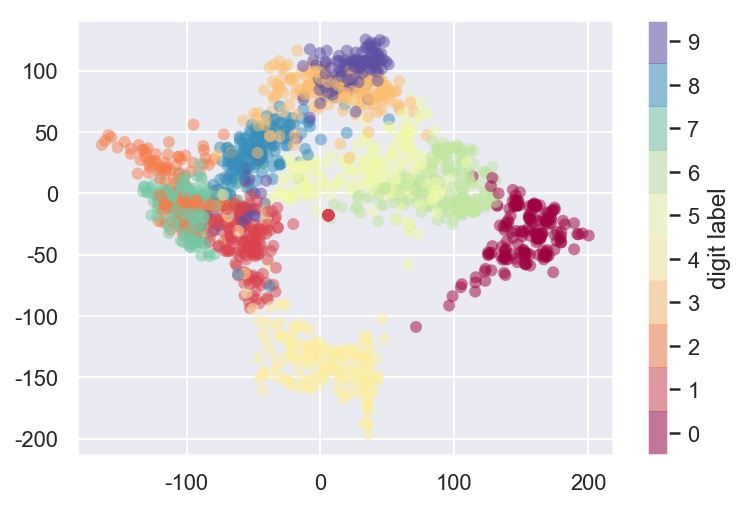

In [30]:
plt.scatter(
    data_projected[:, 0],
    data_projected[:, 1],
    c=digits.target,
    edgecolor='none',
    alpha=0.5,
    cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

### 数字分类

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

使用高斯朴素贝叶斯模型

In [32]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.8333333333333334

这个指标给的信息太少，这个时候，就要搬出混淆矩阵了。

混淆矩阵配合热力图显示。

Text(89.18, 0.5, 'true value')

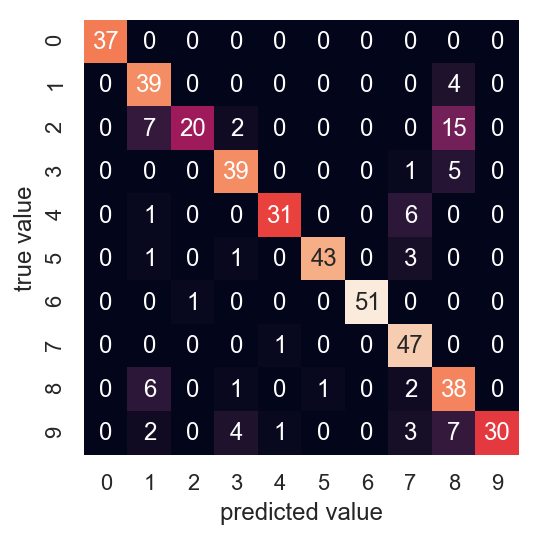

In [34]:
from sklearn.metrics import confusion_matrix

# 注意：真实值在前，预测值在后，这是约定
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

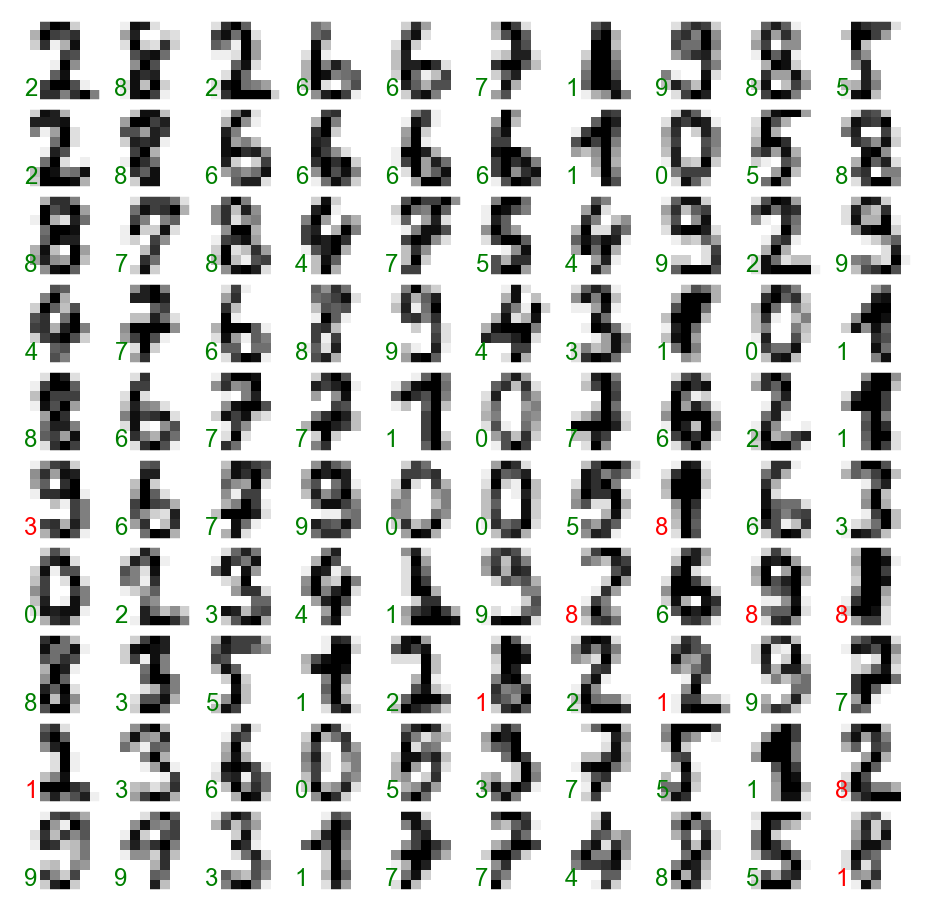

In [35]:
fig, axes = plt.subplots(
    10,
    10,
    figsize=(8, 8),
    subplot_kw={'xticks': [],
                'yticks': []},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(
        0.05,
        0.05,
        str(y_model[i]),
        transform=ax.transAxes,
        color='green' if (ytest[i] == y_model[i]) else 'red')